# Reading real-time EEG data from the LSL server

TODO: Authors

TODO: Intro to reading in epochs

TODO: based on notebook from mne_realtime + bitbrain script

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt

from mne.datasets import sample
from mne.io import read_raw_fif

import mne
from mne_realtime import LSLClient, MockLSLStream

import bbtools as bbt

In [1]:
# this is the host id that identifies your stream on LSL
host = 'localhost'
# this is the max wait time in seconds until client connection
wait_max = 5

In [ ]:
# TODO: replace this with info object alone

raw = bbt.read_csv(
    "data/Feb-15-Borja-ojos-cerrados-Activity-No-Labels-BBT-E16-AAA005-2020-02-15_12-59-21/EEG.csv",
    ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']
)

<IPython.core.display.Javascript object>


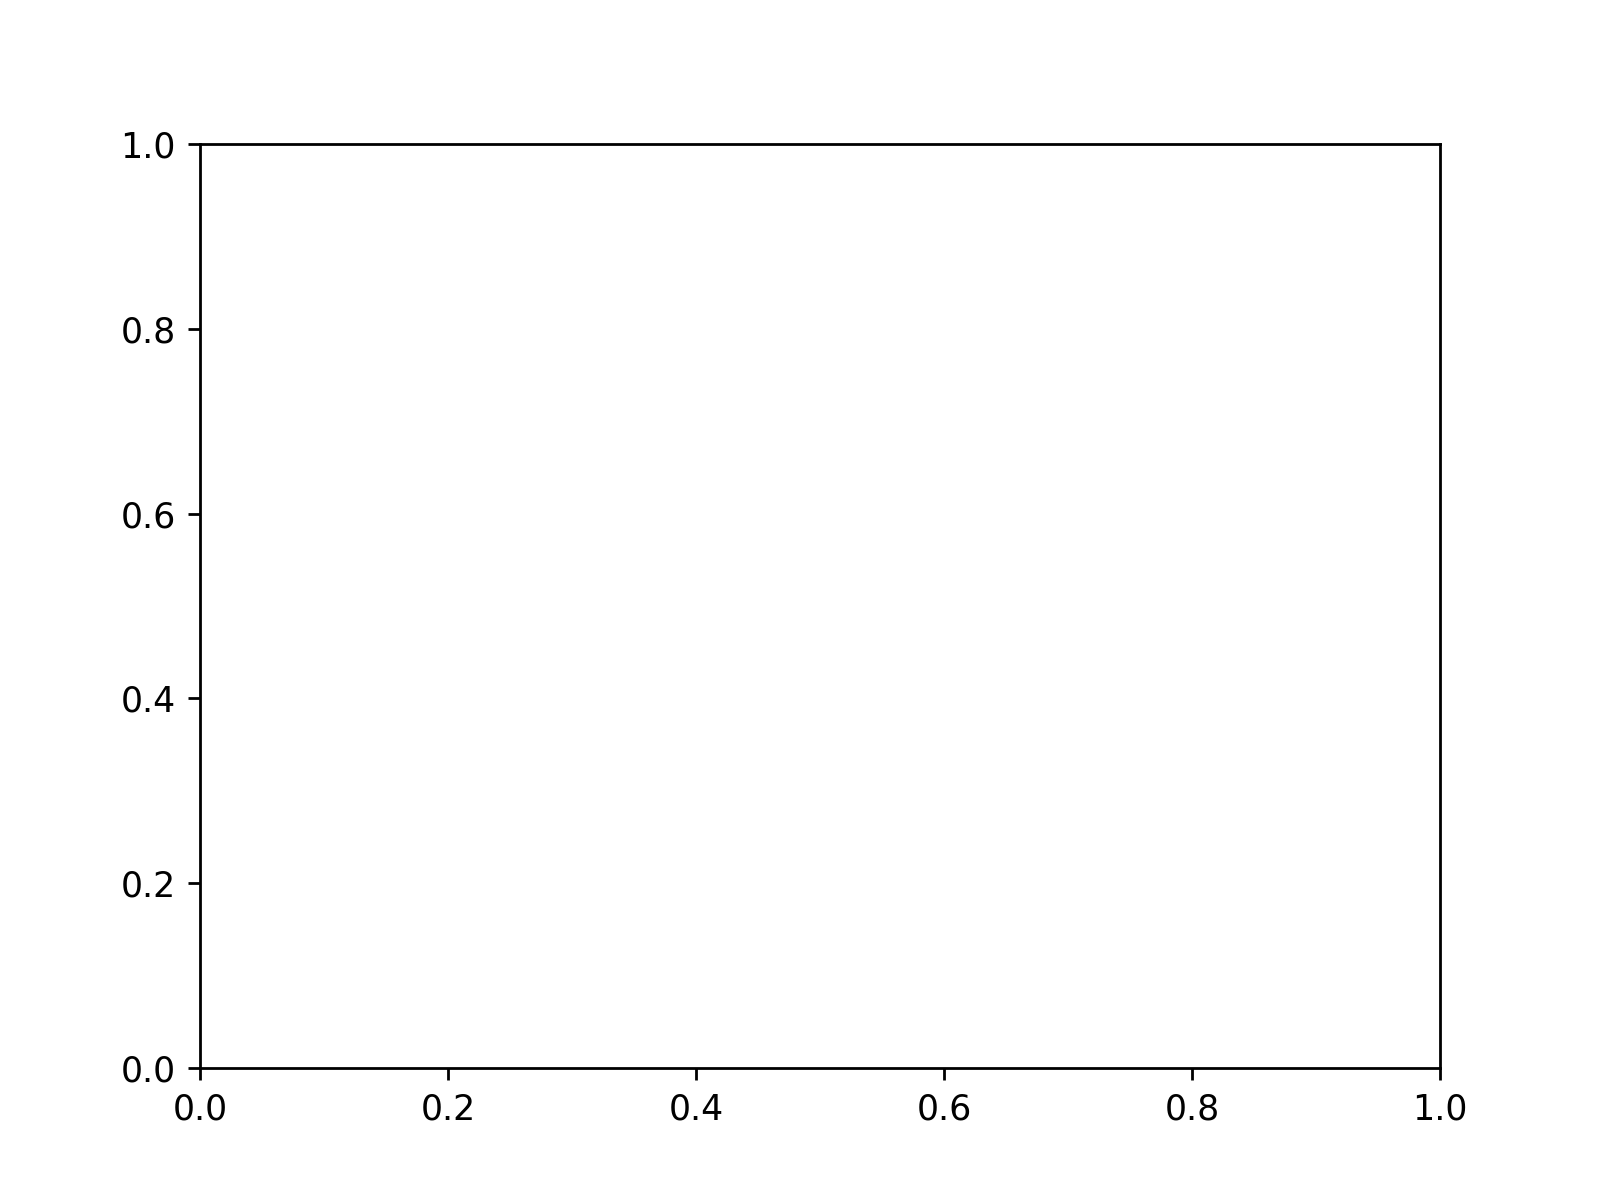

Client: Waiting for server to start
Client: Connected
1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


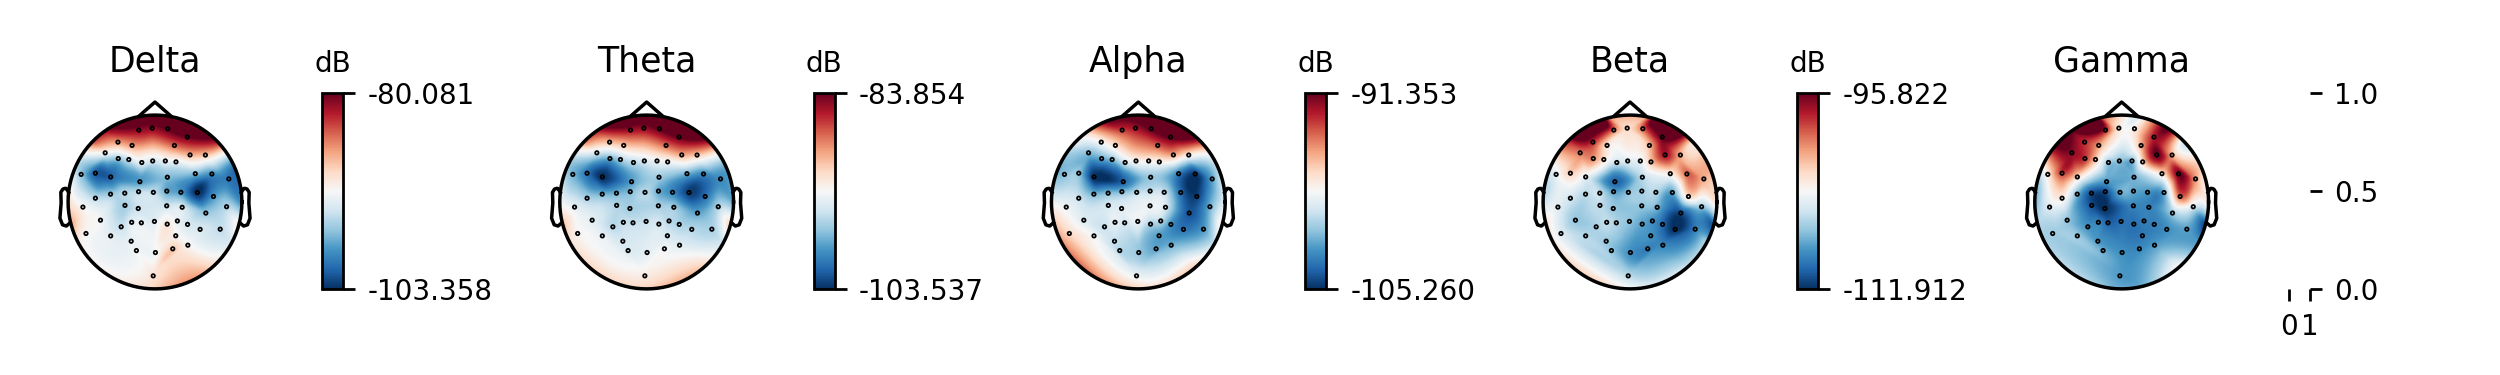

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


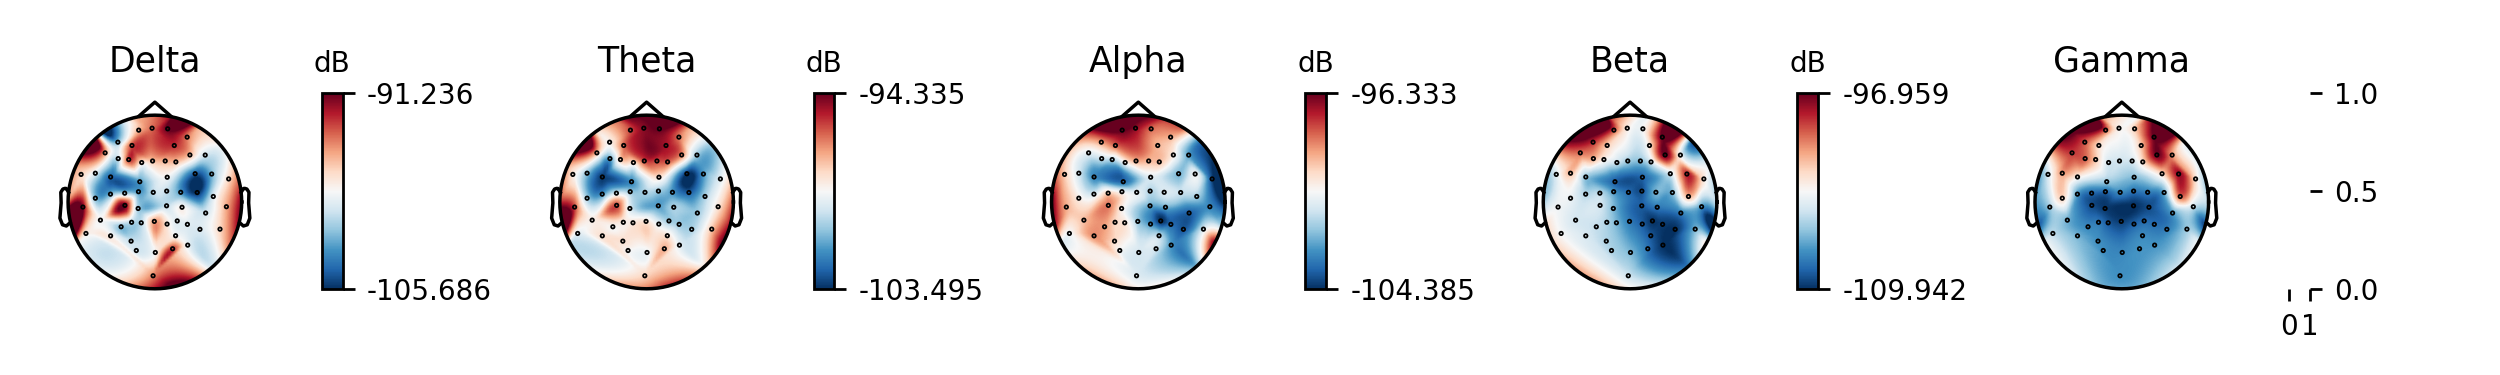

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


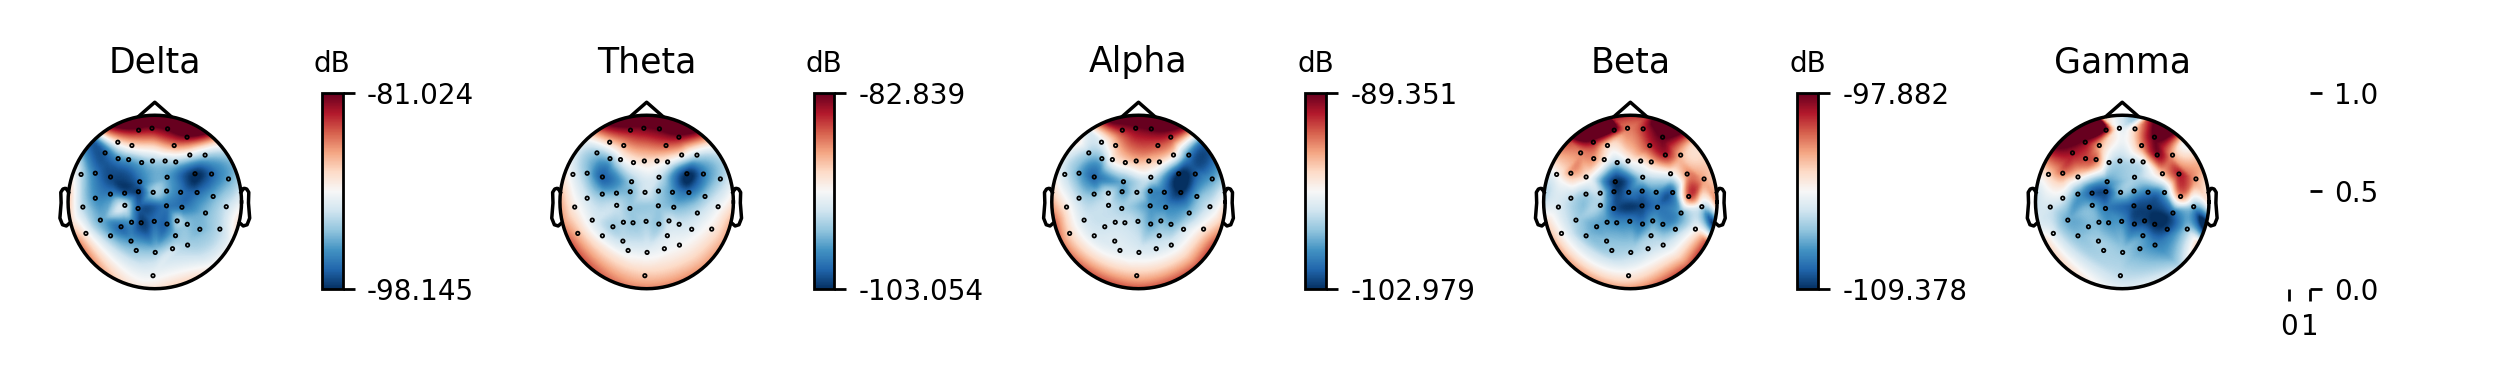

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


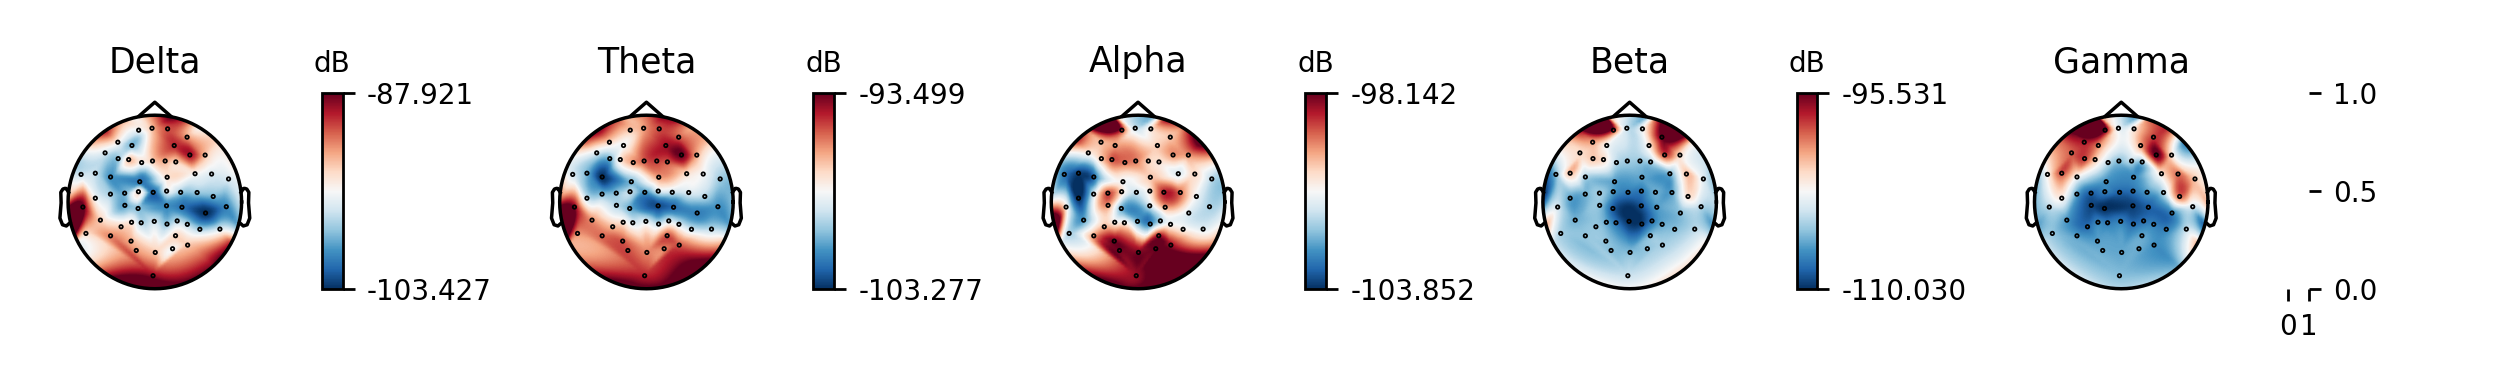

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


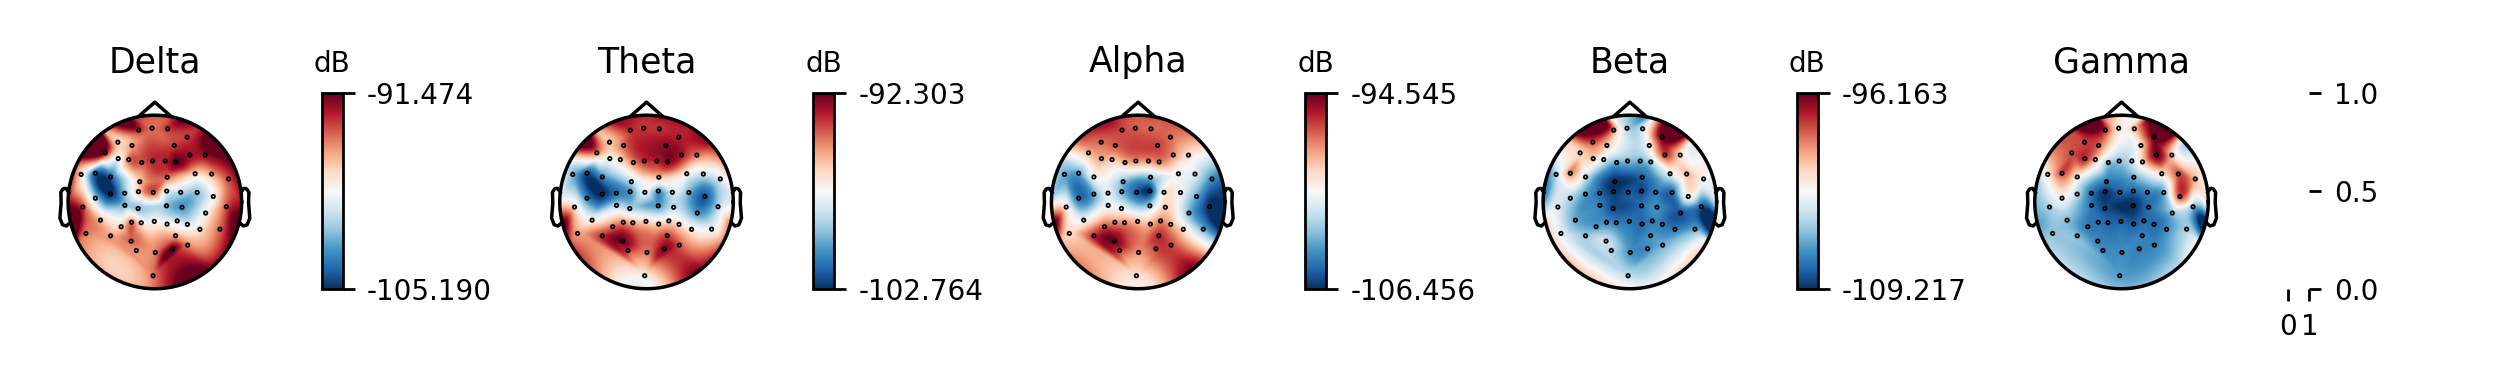

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


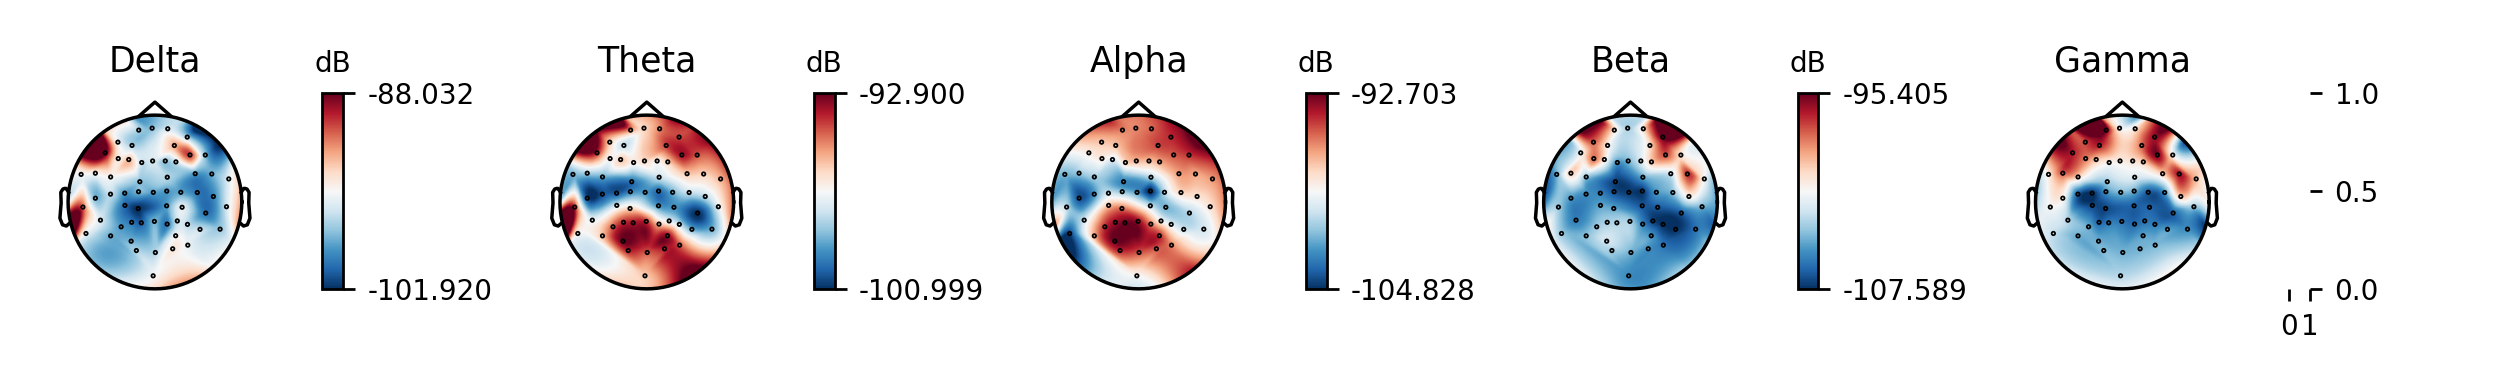

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


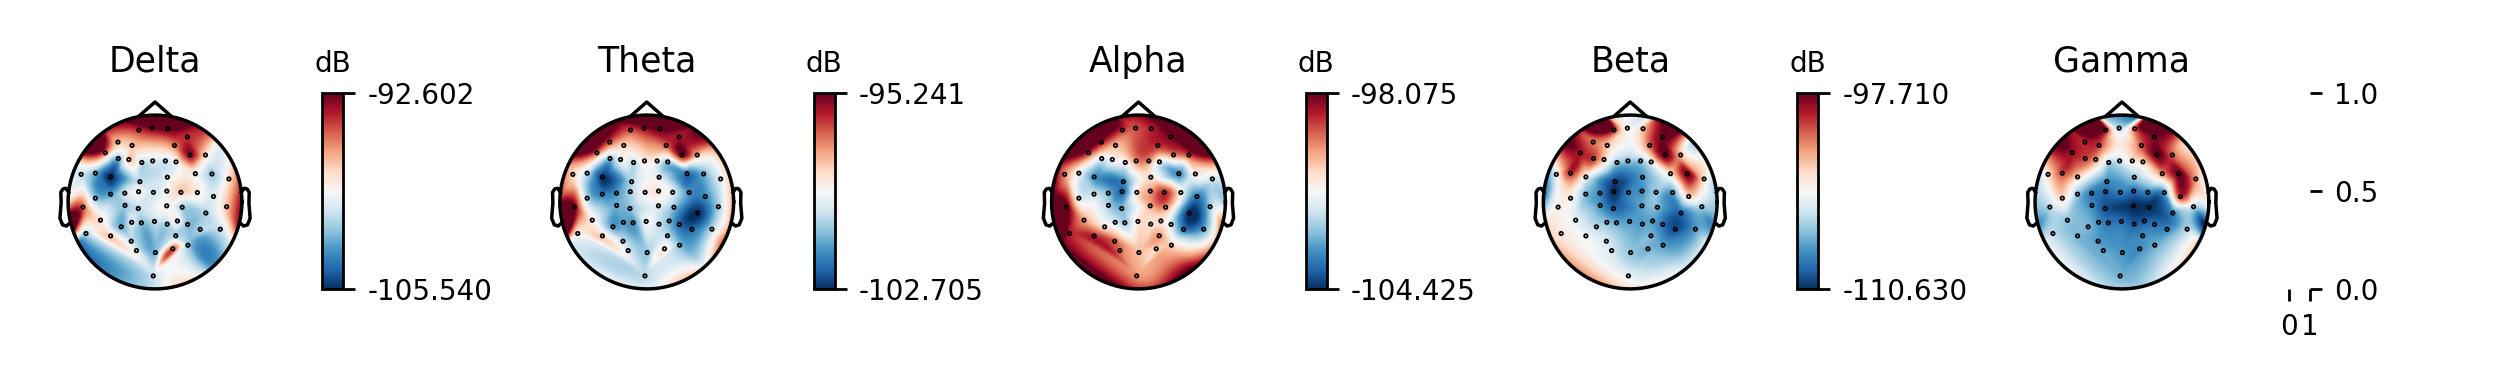

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


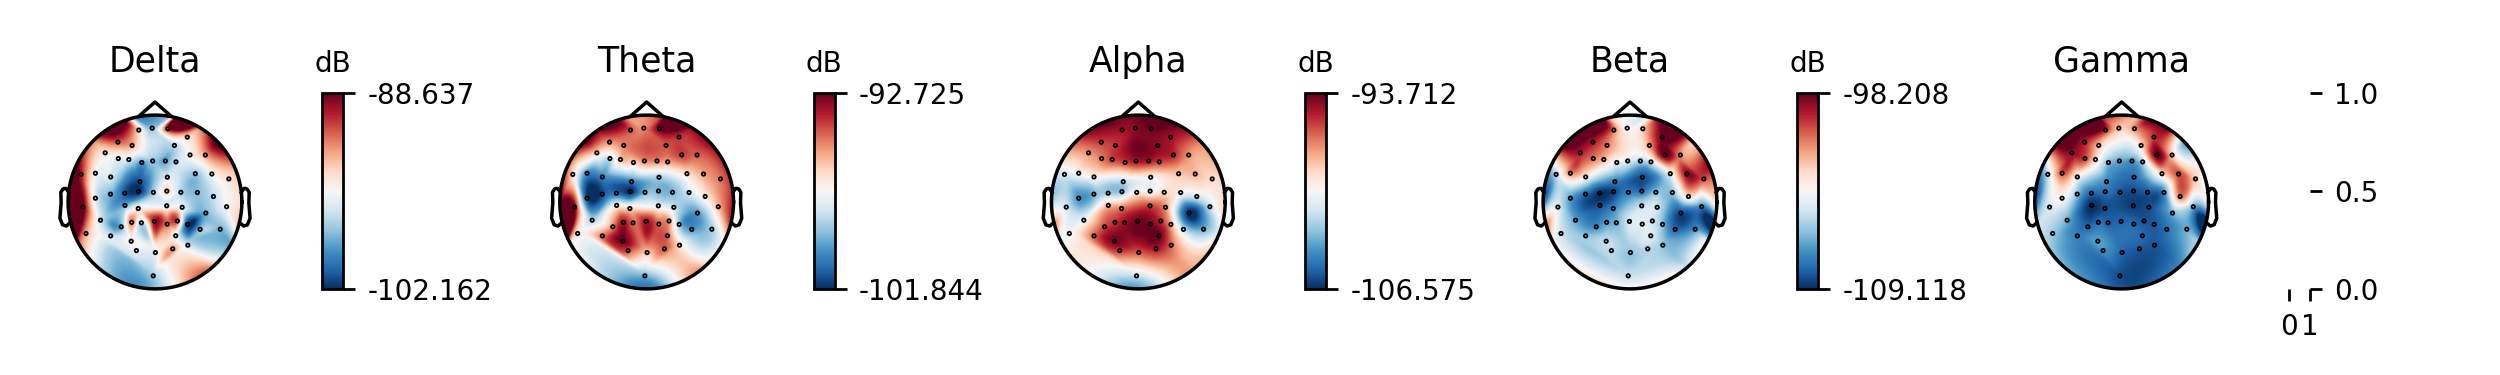

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


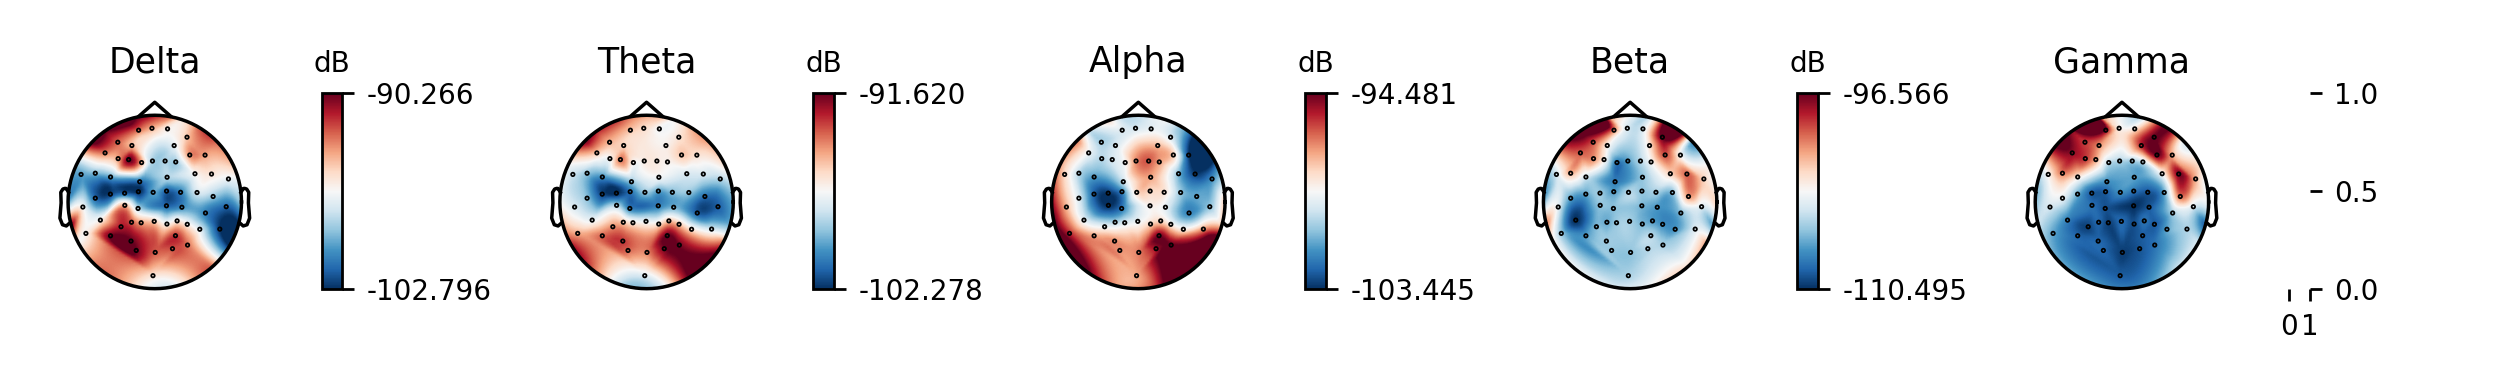

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


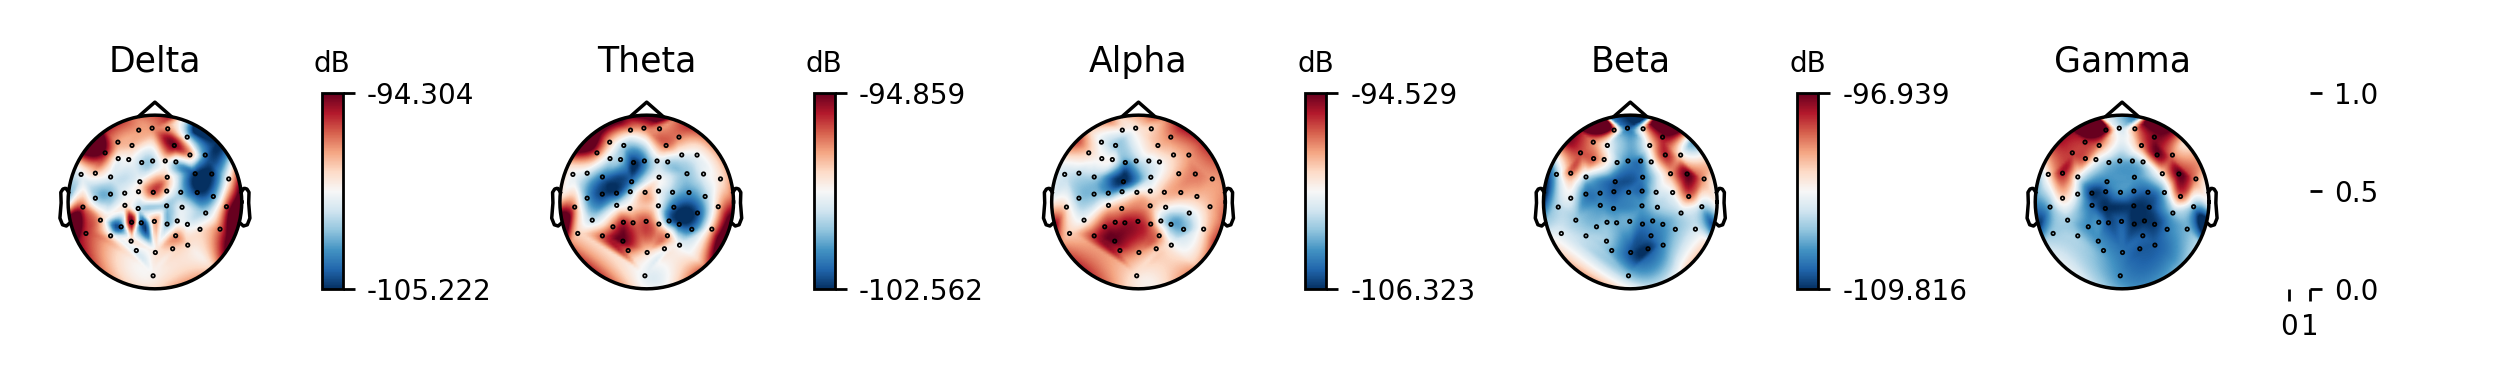

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


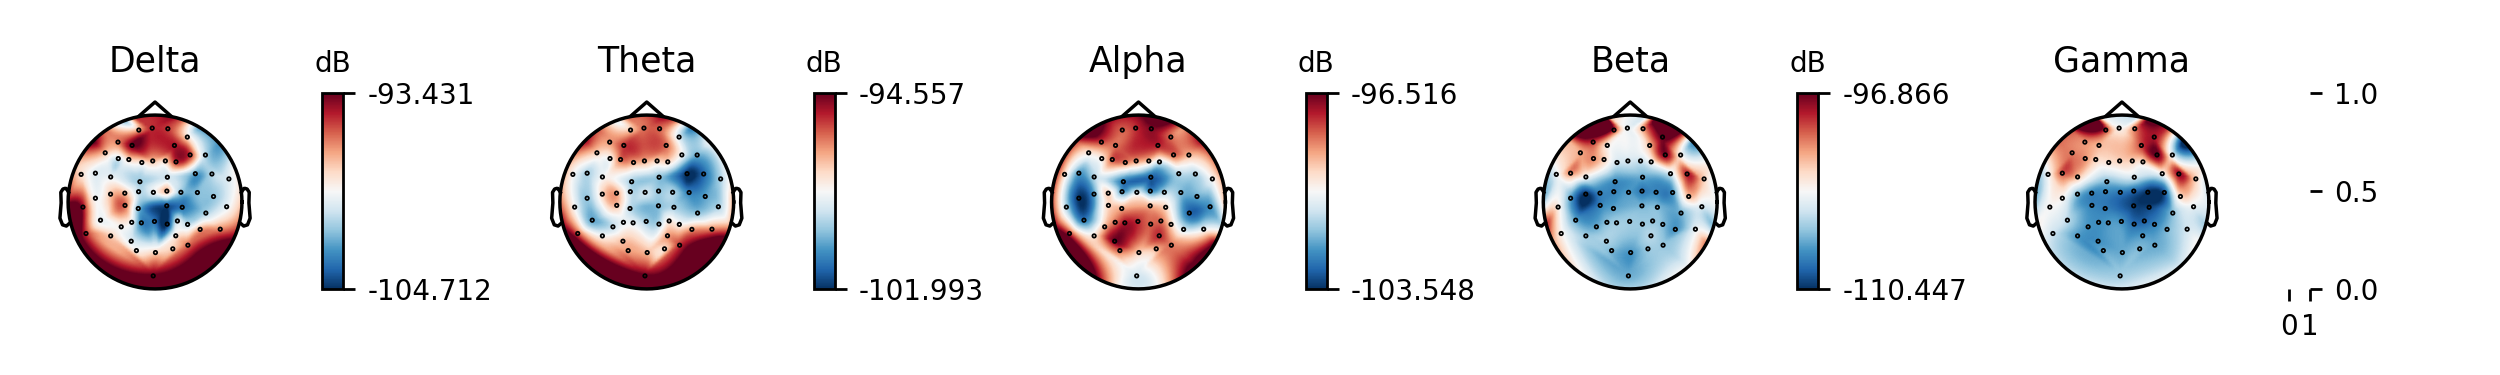

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


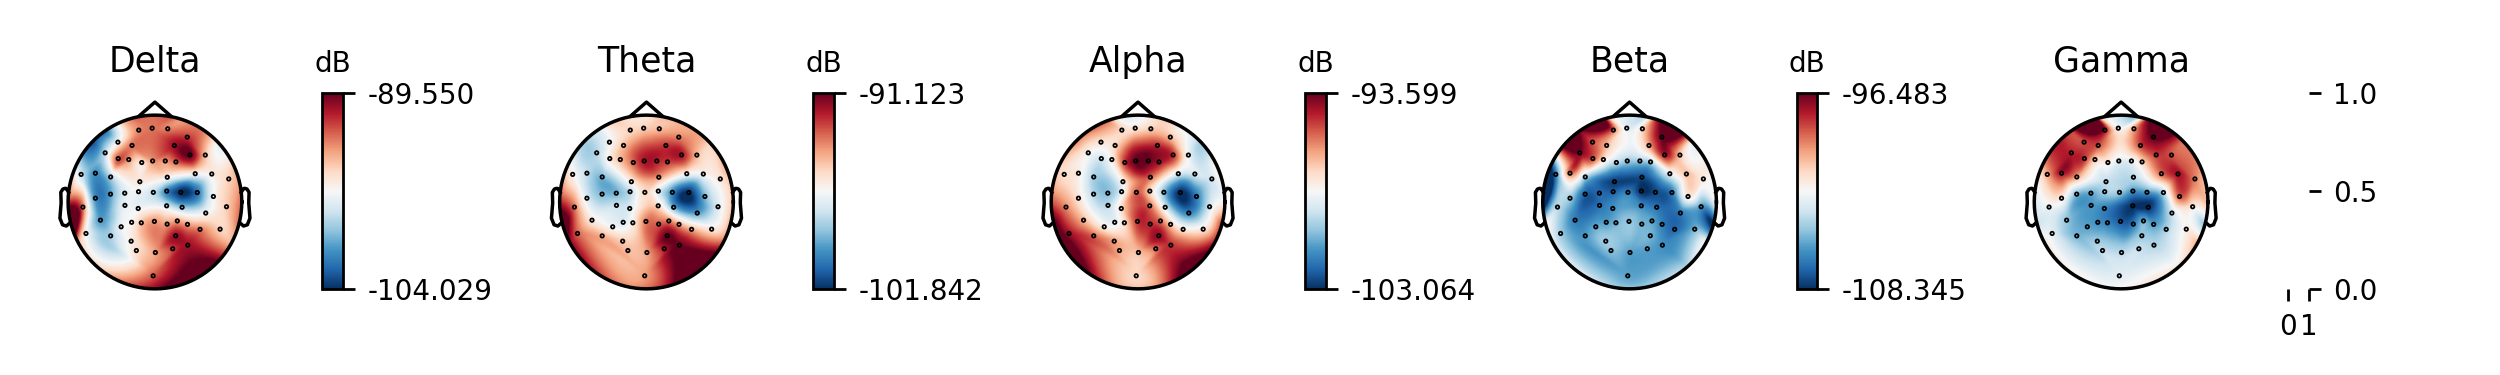

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


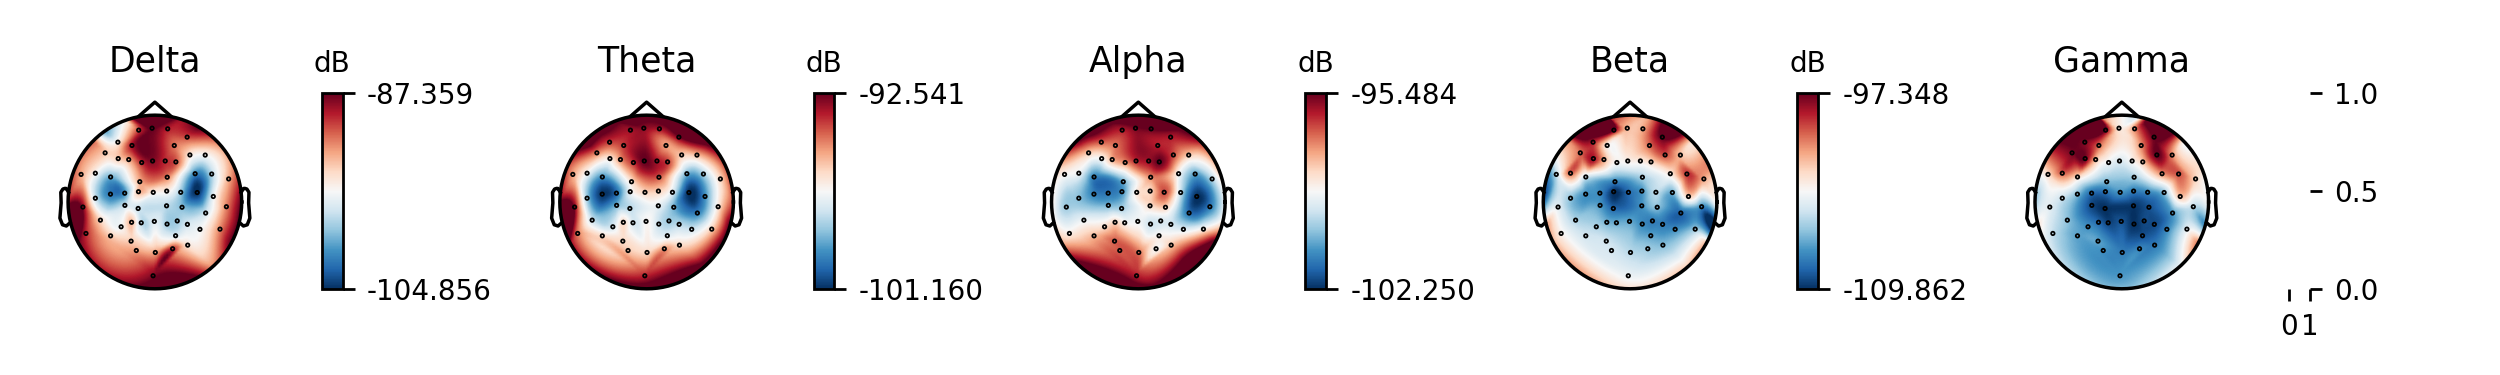

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


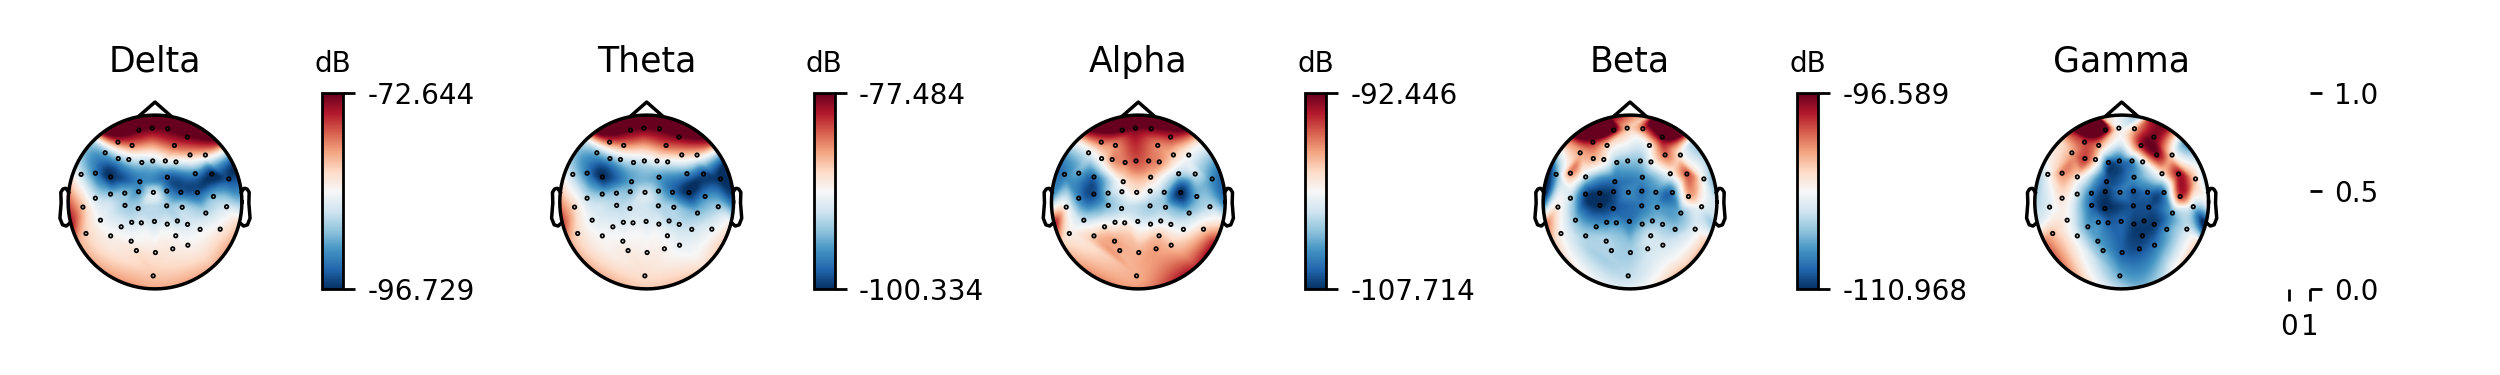

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


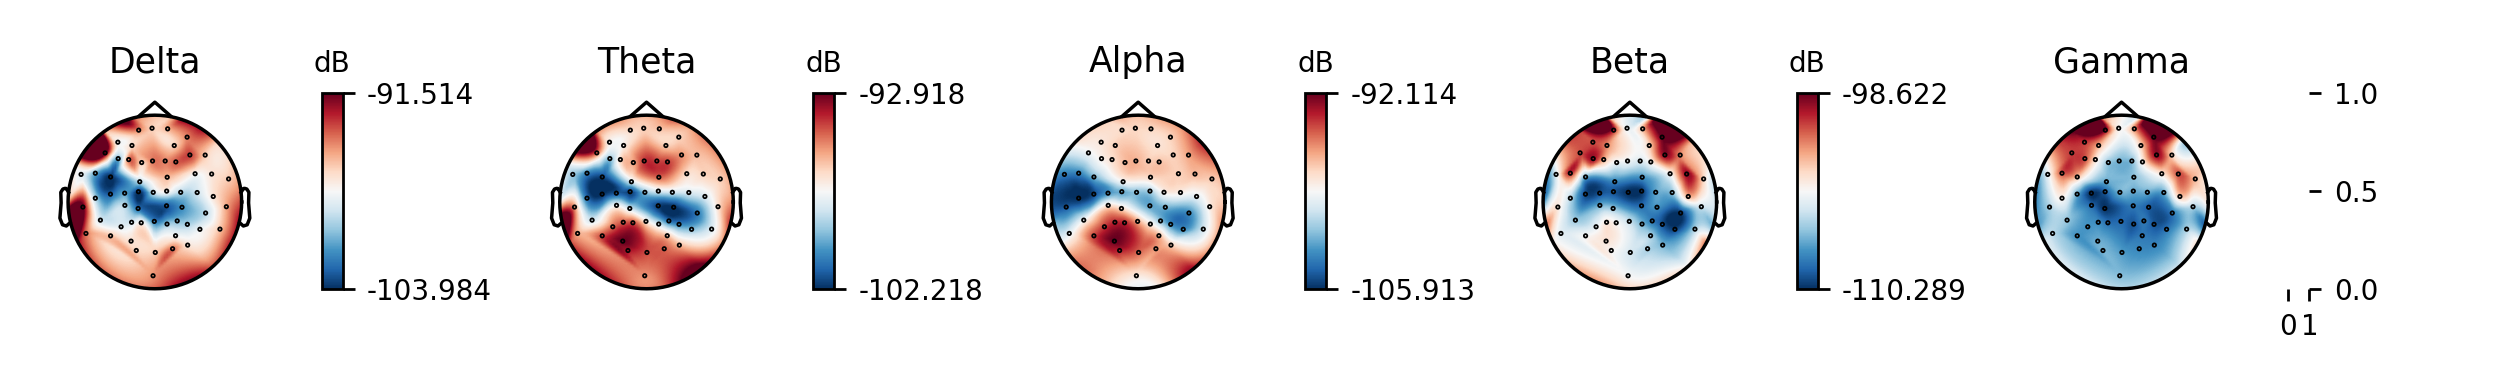

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


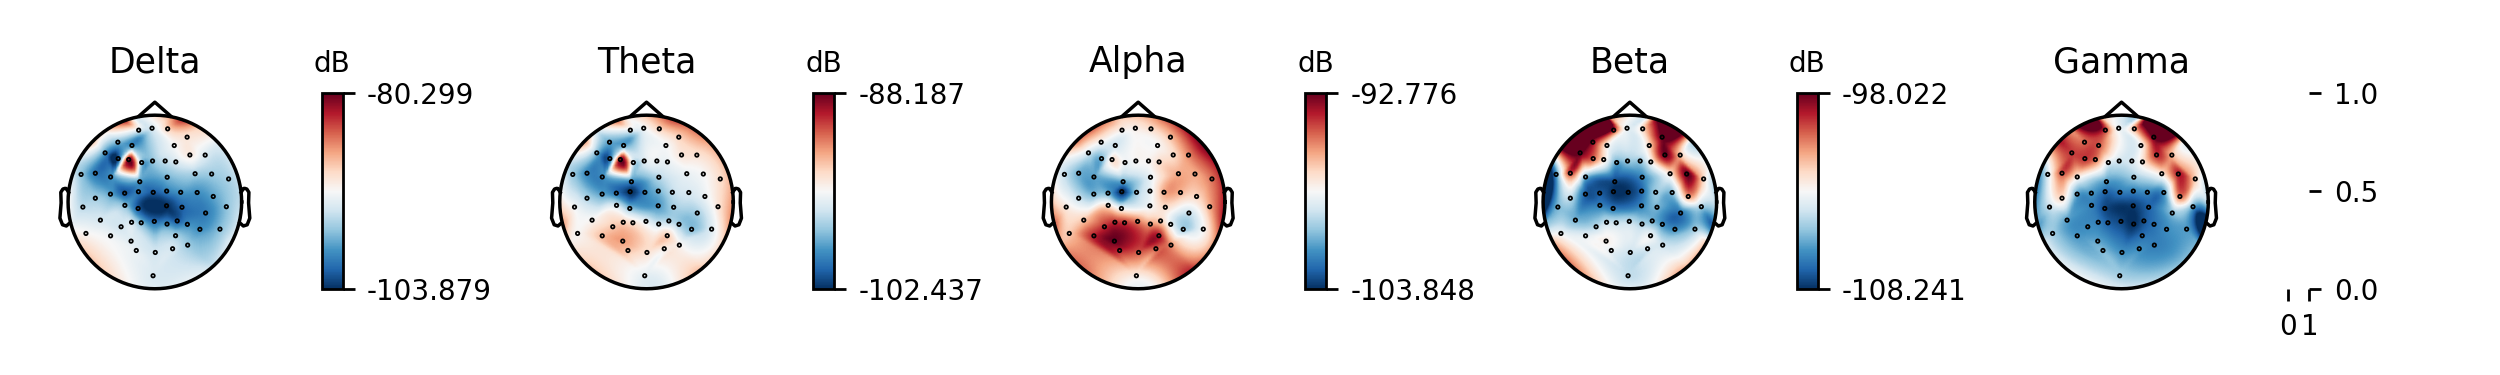

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


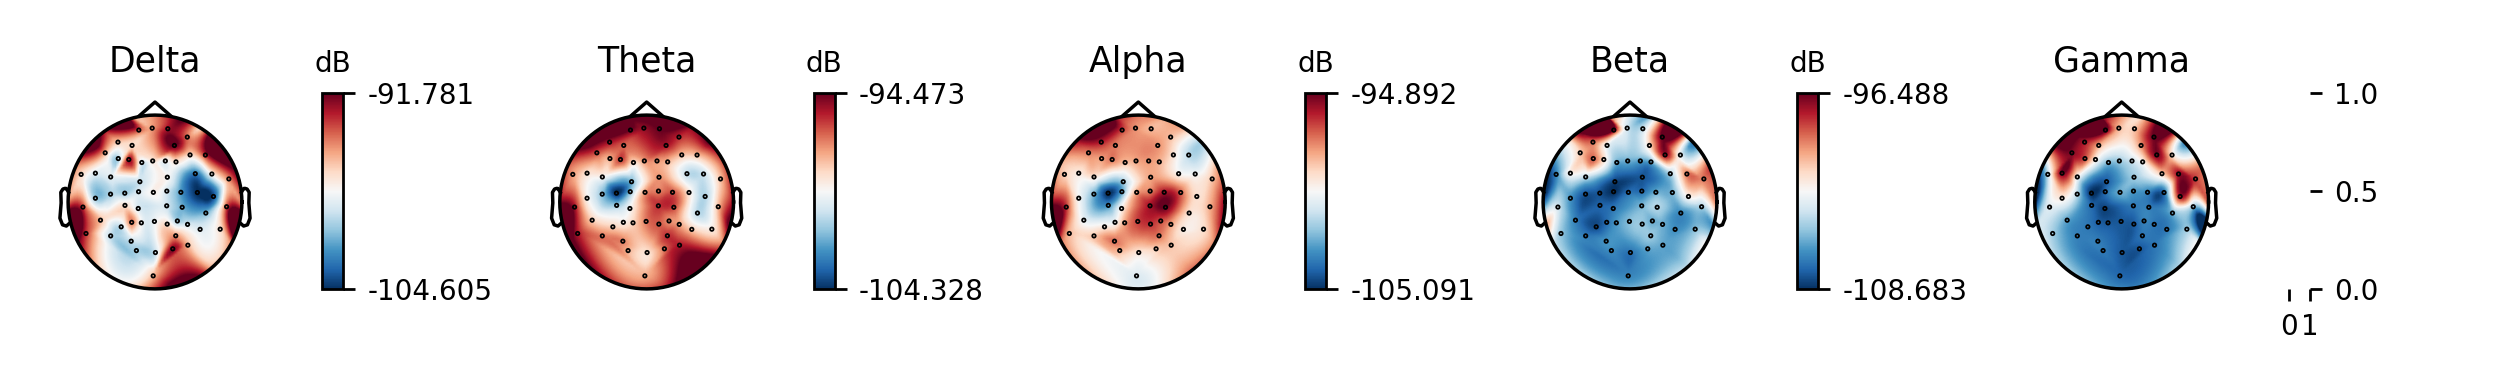

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


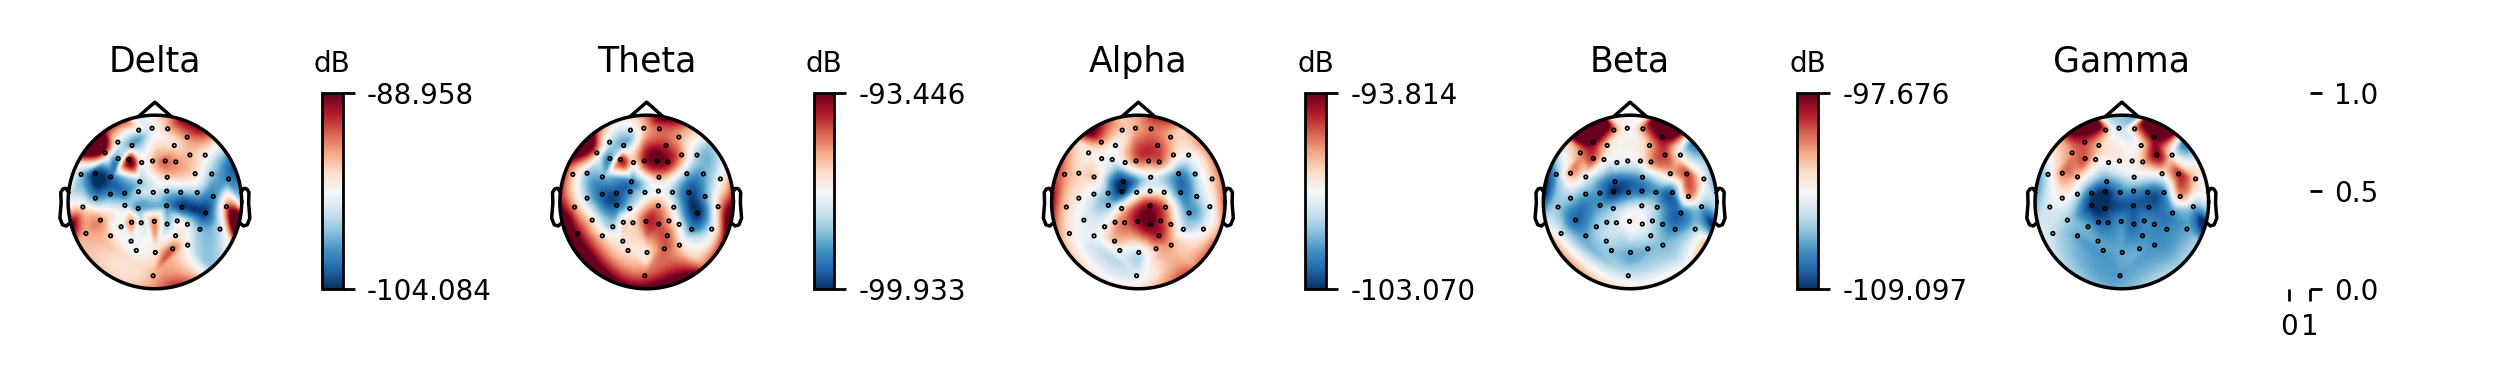

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


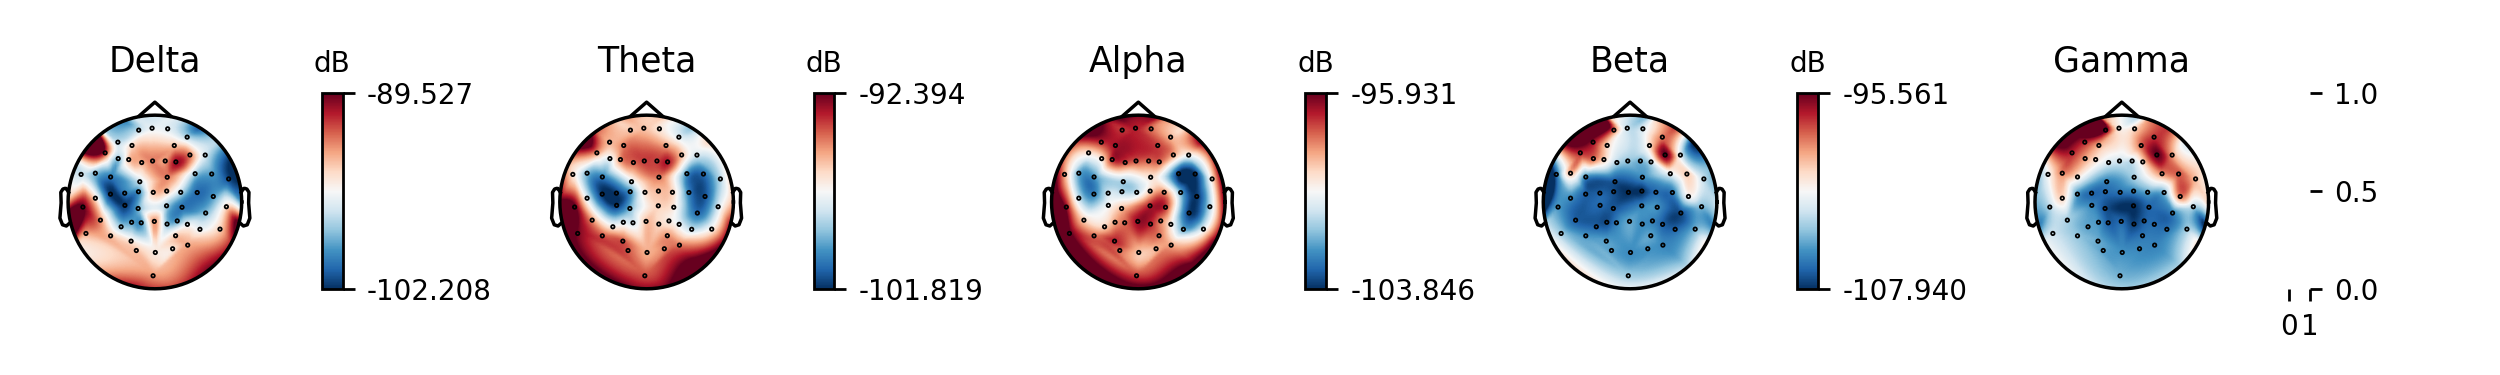

1 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


/Users/javi/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


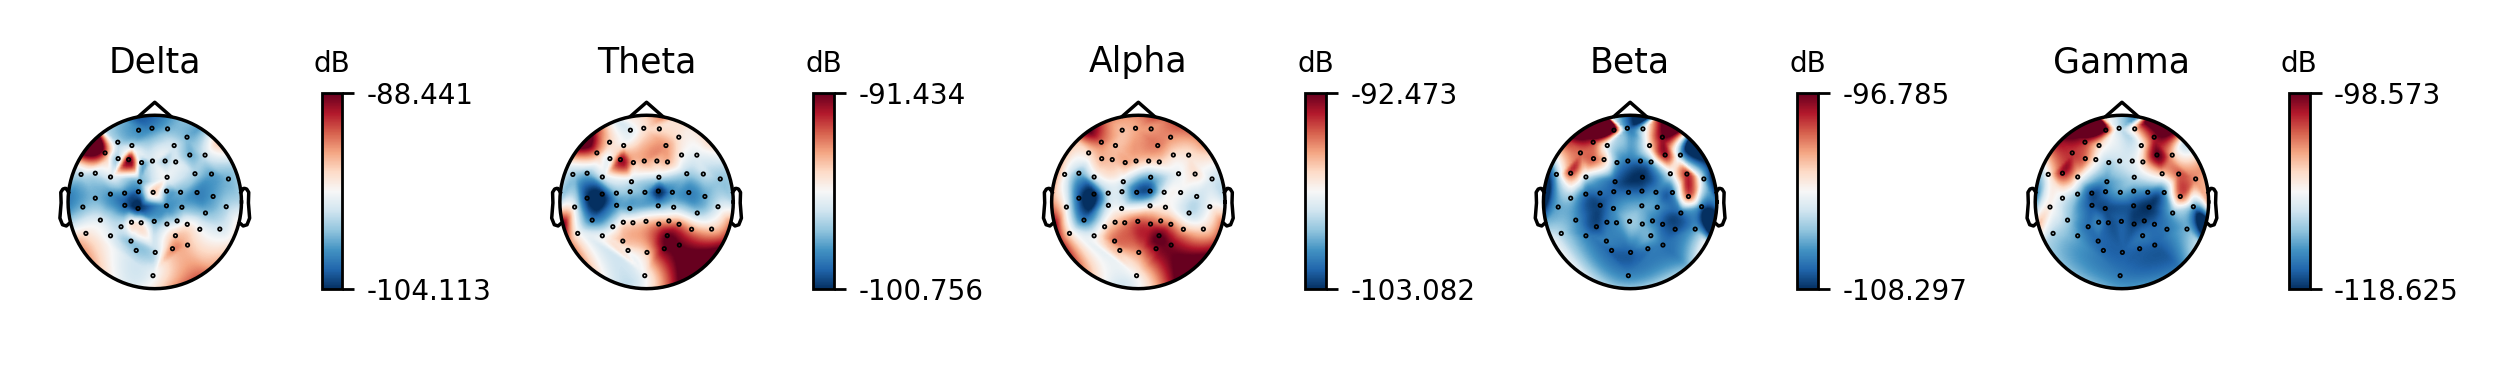

In [6]:
# Let's observe it
plt.ion()  # make plot interactive
_, ax = plt.subplots(1)

with LSLClient(info=raw.info, host=host, wait_max=wait_max) as client:
    client_info = client.get_measurement_info()
    sfreq = int(client_info['sfreq'])
    #print(client_info)

    # let's observe ten seconds of data
    for ii in range(20):
        plt.cla()
        epoch = client.get_data_as_epoch(n_samples=sfreq)
        epoch.plot_psd_topomap()
        #print(epoch.get_data())
        #epoch.average().plot(axes=ax)
        plt.pause(1)
plt.draw()